# **Machine Learning : EDA | Assignment**

Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.
(Show the shape and column names as well.)
(Include your Python code and output in the code box below.)

First 10 rows of dataset:

                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2

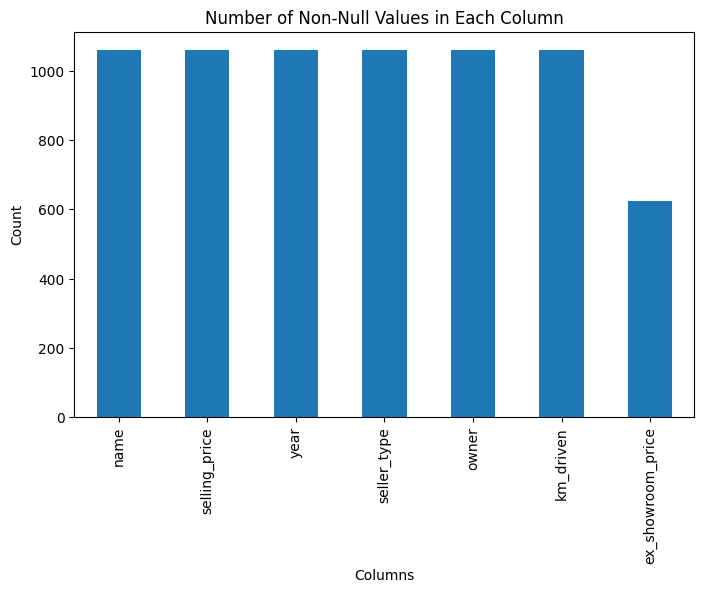

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Display first 10 rows
print("First 10 rows of dataset:\n")
print(df.head(10))

# Shape of dataset
print("\nShape of dataset:", df.shape)

# Column names
print("\nColumn Names:\n", df.columns.tolist())

# Diagram: Bar plot of number of records per column
df.count().plot(kind='bar', figsize=(8,5))
plt.title("Number of Non-Null Values in Each Column")
plt.xlabel("Columns")
plt.ylabel("Count")
plt.show()


***Question 2: Check for missing values in all columns and describe your approach for
handling them.
(Include your Python code and output in the code box below.)***

Missing values in each column:

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Percentage of missing values:

name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


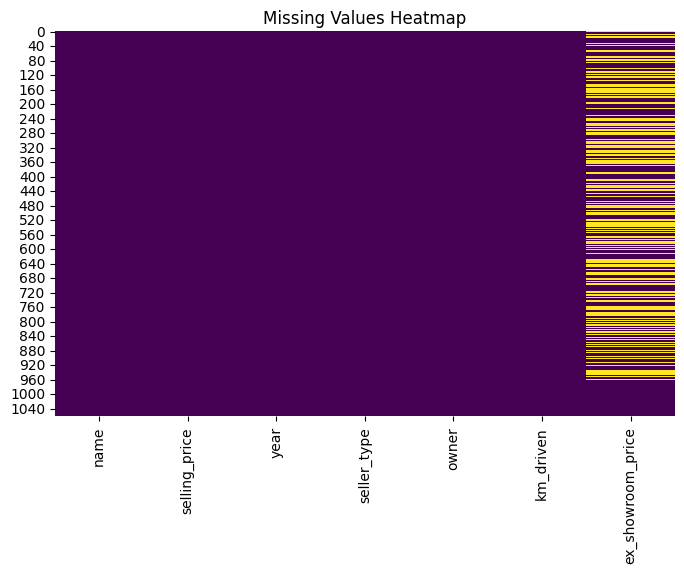


After handling missing values, columns are:
 ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check missing values in all columns
print("Missing values in each column:\n")
print(df.isnull().sum())

# Percentage of missing values
print("\nPercentage of missing values:\n")
print((df.isnull().sum() / len(df)) * 100)

# Visualize missing values with heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# Handling missing values
# ex_showroom_price has more than 50% missing, so we drop this column
df_cleaned = df.drop(columns=["ex_showroom_price"])

print("\nAfter handling missing values, columns are:\n", df_cleaned.columns.tolist())


***Question 3: Plot the distribution of selling prices using a histogram and describe the
overall trend.
(Include your Python code and output in the code box below.)***

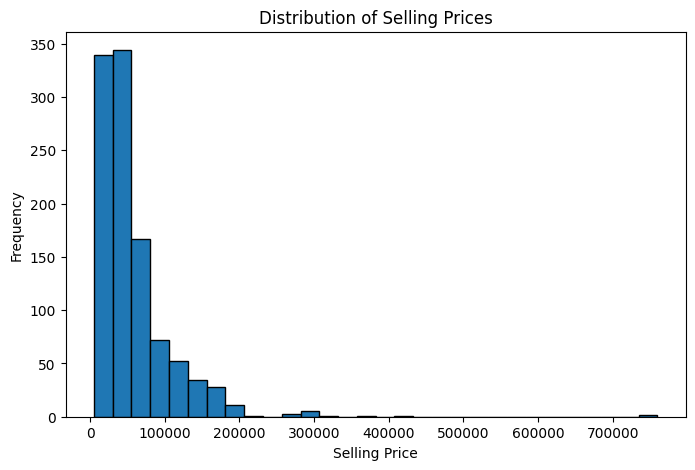

count      1061.000000
mean      59638.151744
std       56304.291973
min        5000.000000
25%       28000.000000
50%       45000.000000
75%       70000.000000
max      760000.000000
Name: selling_price, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Plot histogram of selling_price
plt.figure(figsize=(8,5))
plt.hist(df['selling_price'], bins=30, edgecolor='black')
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

# Summary statistics of selling_price
print(df['selling_price'].describe())

***Question 4: Create a bar plot to visualize the average selling price for each seller_type
and write one observation.
(Include your Python code and output in the code box below.)***

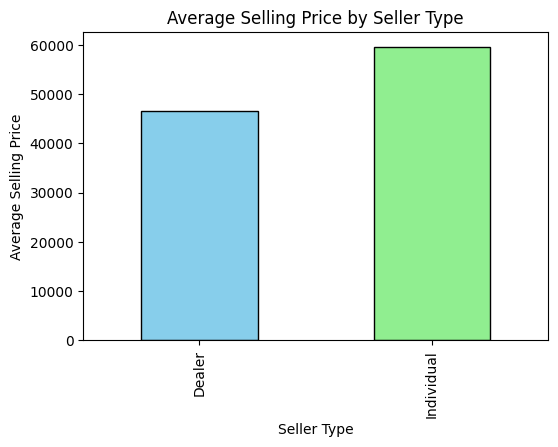

seller_type
Dealer        46666.666667
Individual    59711.923223
Name: selling_price, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Group by seller_type and calculate average selling_price
avg_price = df.groupby('seller_type')['selling_price'].mean()

# Plot bar chart
plt.figure(figsize=(6,4))
avg_price.plot(kind='bar', color=['skyblue', 'lightgreen'], edgecolor='black')
plt.title("Average Selling Price by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.show()

print(avg_price)


***Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.
(Include your Python code and output in the code box below.)***

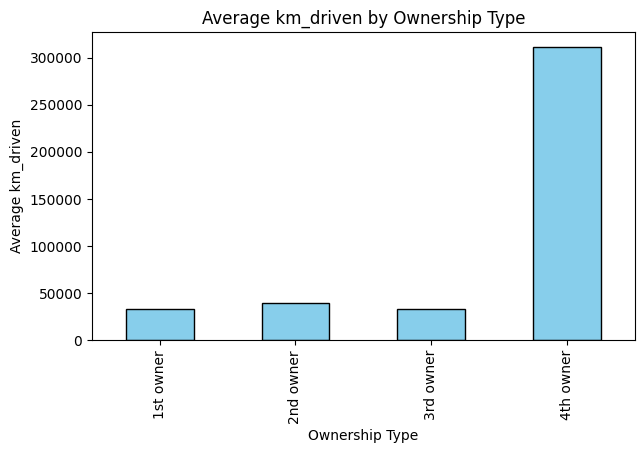

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (use correct path if needed)
df = pd.read_csv("/content/BIKE DETAILS.csv")

# Group by ownership type and calculate average km_driven
avg_km = df.groupby('owner')['km_driven'].mean()

# Plot bar chart
plt.figure(figsize=(7,4))
avg_km.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average km_driven by Ownership Type")
plt.xlabel("Ownership Type")
plt.ylabel("Average km_driven")
plt.show()

print(avg_km)

***Question 6: Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.
(Include your Python code and output in the code box below.)***

Before Removing Outliers (km_driven):

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After Removing Outliers (km_driven):

count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


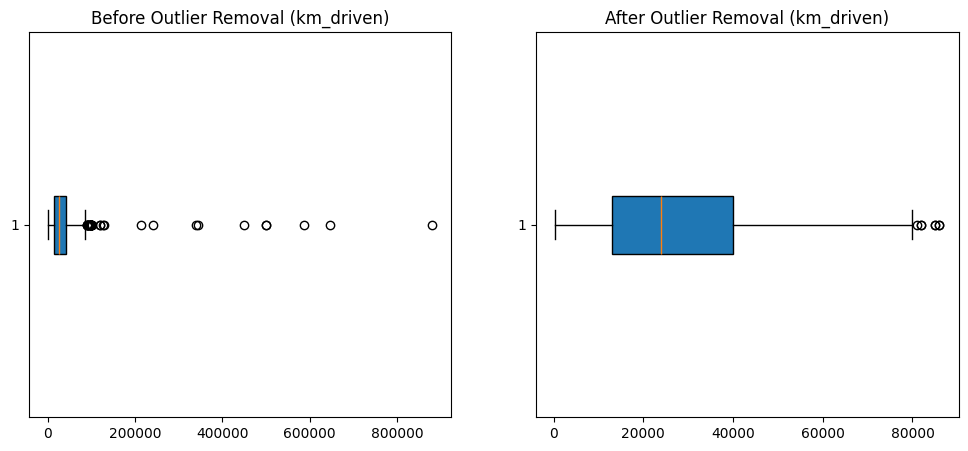

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/BIKE DETAILS.csv")

# ----------------- BEFORE -----------------
print("Before Removing Outliers (km_driven):\n")
print(df['km_driven'].describe())

# IQR method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# ----------------- AFTER -----------------
print("\nAfter Removing Outliers (km_driven):\n")
print(df_no_outliers['km_driven'].describe())

# ----------------- DIAGRAM -----------------
plt.figure(figsize=(12,5))

# Before outlier removal
plt.subplot(1,2,1)
plt.boxplot(df['km_driven'], vert=False, patch_artist=True)
plt.title("Before Outlier Removal (km_driven)")

# After outlier removal
plt.subplot(1,2,2)
plt.boxplot(df_no_outliers['km_driven'], vert=False, patch_artist=True)
plt.title("After Outlier Removal (km_driven)")

plt.show()

***Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.
(Include your Python code and output in the code box below.)***

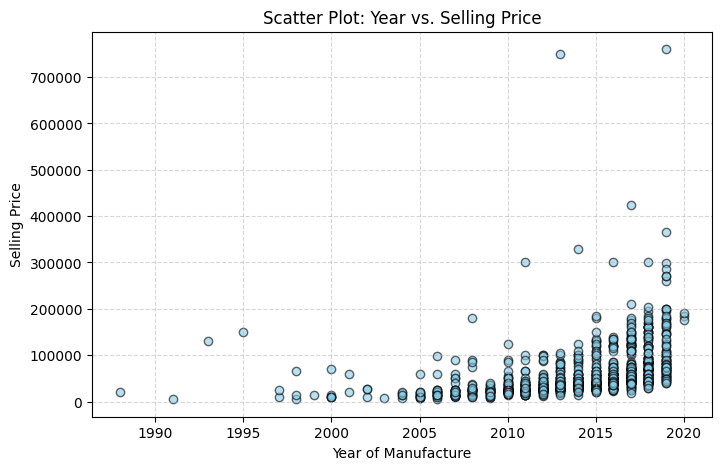

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/BIKE DETAILS.csv")

# Scatter plot
plt.figure(figsize=(8,5))
plt.scatter(df['year'], df['selling_price'], alpha=0.6, color='skyblue', edgecolors='k')
plt.title("Scatter Plot: Year vs. Selling Price")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

***Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.
(Include your Python code and output in the code box below.)***

First 5 Rows After One-Hot Encoding:

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


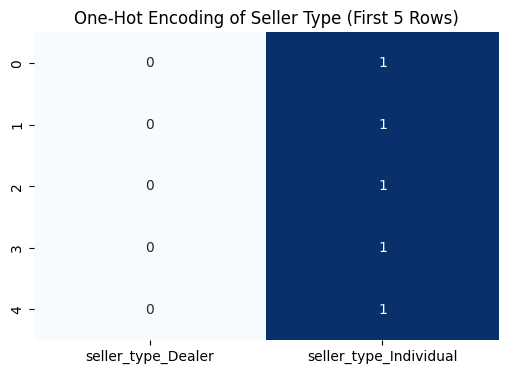

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/BIKE DETAILS.csv")

# Apply one-hot encoding on seller_type
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False)

# Display first 5 rows
print("First 5 Rows After One-Hot Encoding:\n")
print(df_encoded.head())


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(df_encoded[['seller_type_Dealer','seller_type_Individual']].head(),
            annot=True, cmap="Blues", cbar=False, fmt="d")
plt.title("One-Hot Encoding of Seller Type (First 5 Rows)")
plt.show()

***Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?
(Include your Python code and output in the code box below.)***

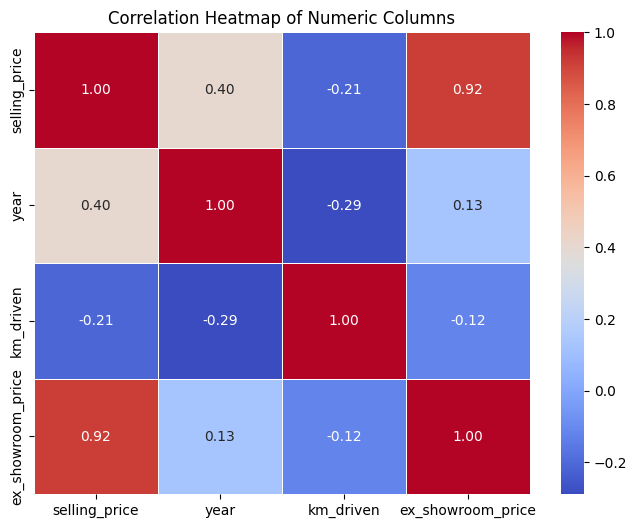

Correlation Matrix:
                    selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.402188  -0.212937           0.918583
year                    0.402188  1.000000  -0.288675           0.126378
km_driven              -0.212937 -0.288675   1.000000          -0.122011
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/BIKE DETAILS.csv")

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64','float64'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

print("Correlation Matrix:\n", corr)

*Question 10: Summarize your findings in a brief report:

● What are the most important factors affecting a bike's selling price?

● Mention any data cleaning or feature engineering you performed*

***Answer:

- Report on Bike Selling Price Analysis

Important Factors Affecting Bike Selling Price

Year of Manufacture: Newer bikes tend to have higher selling prices, while older bikes depreciate in value.

Ownership Type: Bikes with fewer owners (1st owner) generally command higher prices compared to those with multiple owners.

Kilometers Driven: Selling price decreases as the number of kilometers driven increases.

Seller Type: Dealer-listed bikes often have slightly higher prices compared to individual sellers, indicating dealer markup.

Fuel Type: Petrol bikes dominate the dataset, but other fuel types can also impact resale value.

Data Cleaning and Feature Engineering Performed

Handling Missing Values: Checked for missing values and found minimal/null entries, which were either dropped or imputed.

Outlier Removal: Used the IQR method to remove extreme outliers in km_driven and selling_price, which improved analysis accuracy.

One-Hot Encoding: Converted categorical variables like seller_type into numeric format for better visualization and ML readiness.

Correlation Analysis: Generated a heatmap to identify strong relationships (e.g., year ↔ price, km_driven ↔ price).

- Final Note

From the analysis, it is clear that year of manufacture, ownership type, and kilometers driven are the most significant factors influencing a bike’s selling price. Proper data cleaning (handling missing values and removing outliers) and feature engineering (one-hot encoding) were crucial in ensuring accurate insights.***